# **Loan Approval Prediction**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data science/project/loan_data.csv')

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
  print(df[i].unique(),i)
  print("*"*250)
  print(df[i].value_counts(),i)
  print("*"*250)

[ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.] person_age
**********************************************************************************************************************************************************************************************************************************************************
person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
5

In [ ]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'Yes':0,'No':1})

<ipython-input-10-f92ae3afe979>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'Yes':0,'No':1})


In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,1,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,0,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,1,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,1,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,1,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,1,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,1,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,1,1


#LableEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['person_education'] = label_encoder.fit_transform(df['person_education'])

#OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe1=OneHotEncoder()
gender=ohe1.fit_transform(df[['person_gender']]).toarray()
gender=pd.DataFrame(gender,columns=ohe1.get_feature_names_out())
df=pd.concat([df,gender],axis=1)
df.drop('person_gender',axis=1,inplace=True)

ohe2=OneHotEncoder()
home=ohe2.fit_transform(df[['person_home_ownership']]).toarray()
home=pd.DataFrame(home,columns=ohe2.get_feature_names_out())
df=pd.concat([df,home],axis=1)
df.drop('person_home_ownership',axis=1,inplace=True)

ohe3=OneHotEncoder()
intent=ohe3.fit_transform(df[['loan_intent']]).toarray()
intent=pd.DataFrame(intent,columns=ohe3.get_feature_names_out())
df=pd.concat([df,intent],axis=1)
df.drop('loan_intent',axis=1,inplace=True)

In [ ]:
df

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,3,12282.0,0,1000.0,11.14,0.08,2.0,504,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,3,12438.0,3,5500.0,12.87,0.44,3.0,635,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,4,66135.0,1,35000.0,14.27,0.53,4.0,586,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,37.0,0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,33.0,0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,29.0,1,33164.0,4,12000.0,13.23,0.36,6.0,604,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
person_age,0
person_education,0
person_income,0
person_emp_exp,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0
previous_loan_defaults_on_file,0


In [ ]:
df.duplicated().sum()

0

#Outlaiers

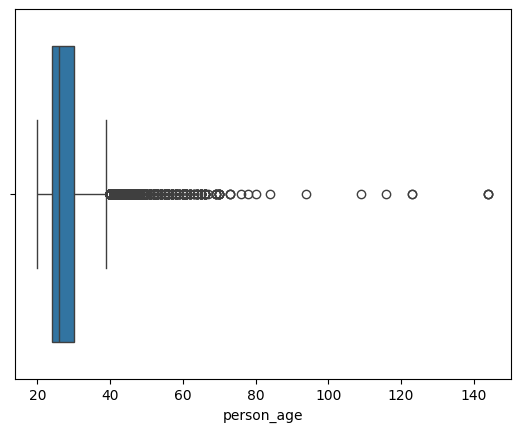

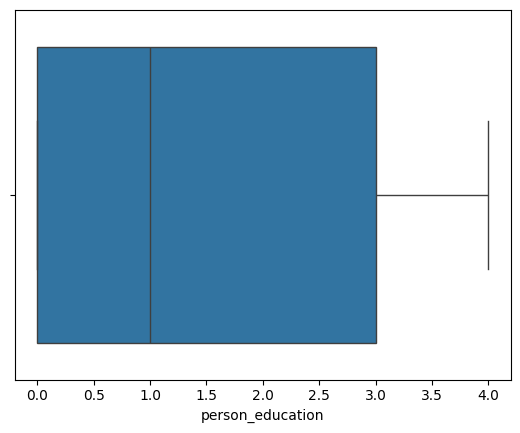

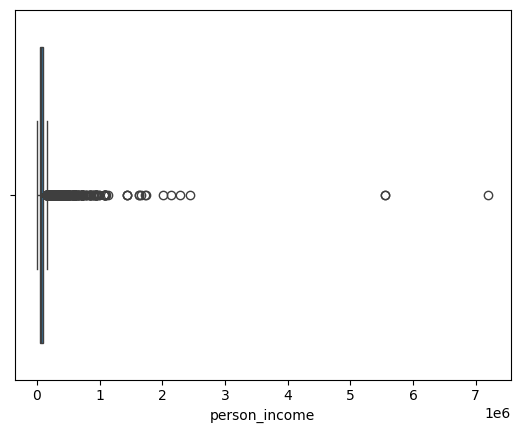

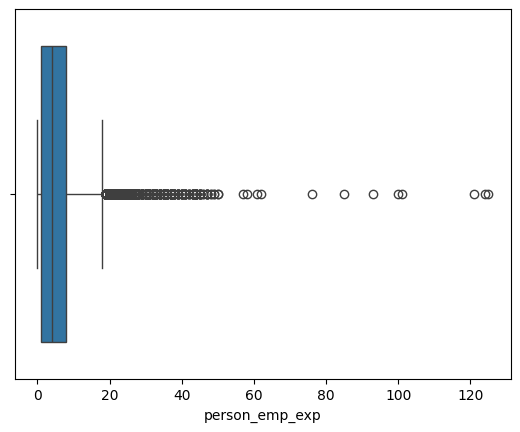

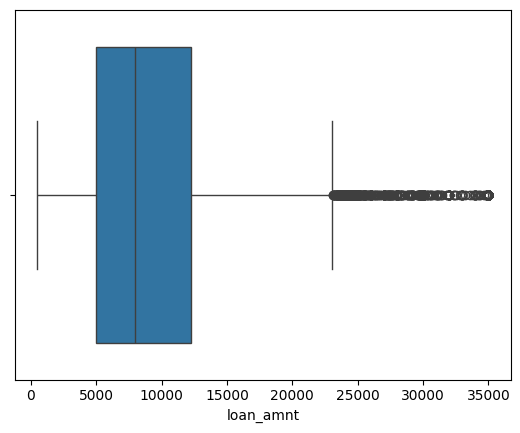

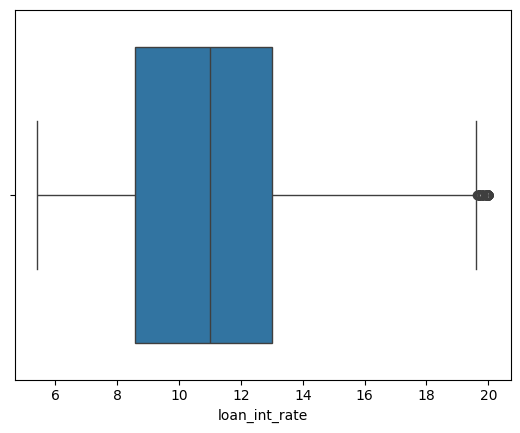

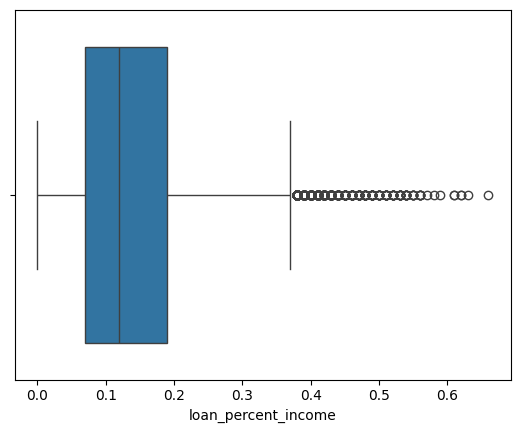

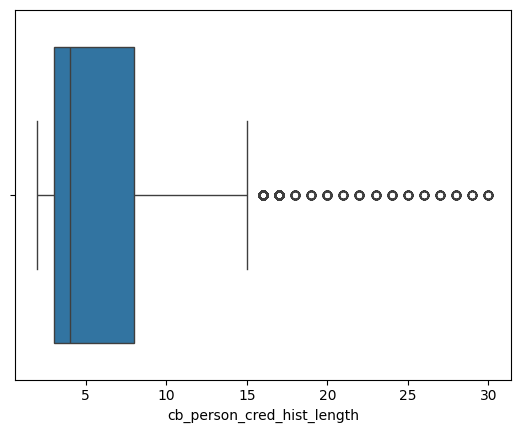

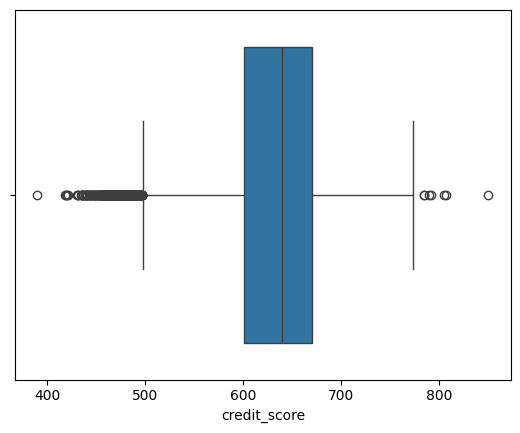

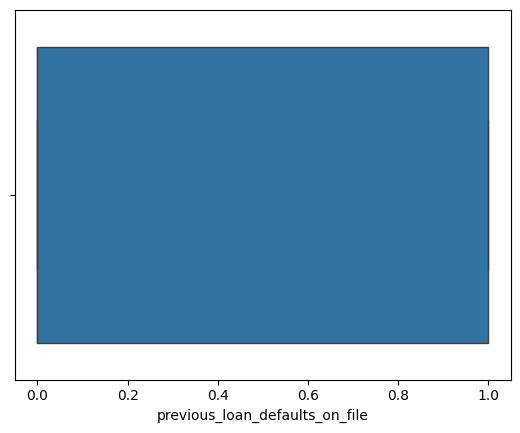

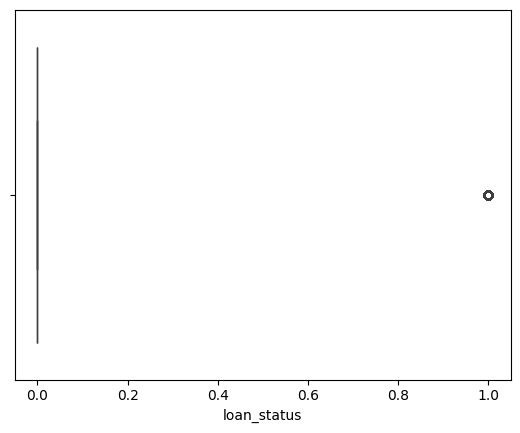

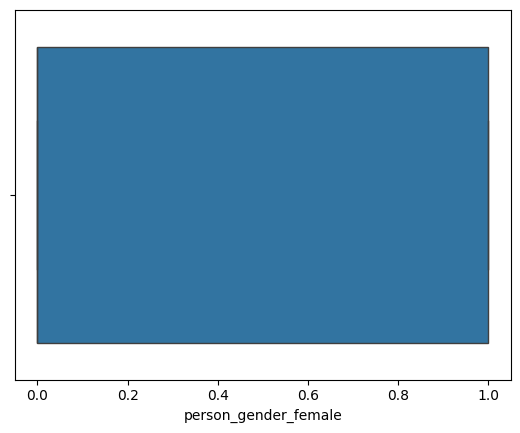

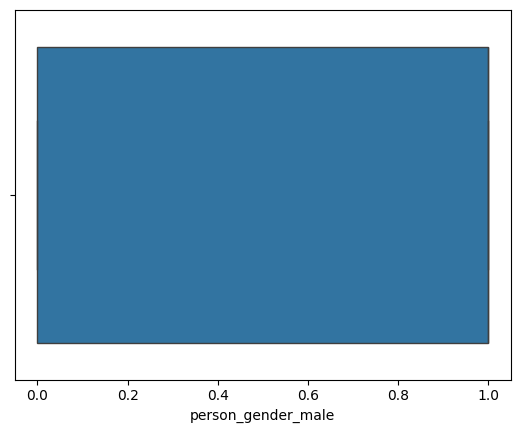

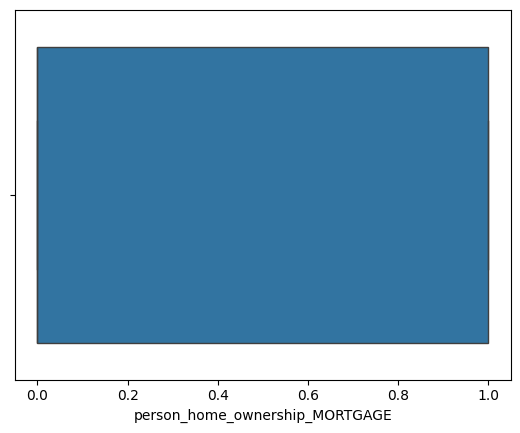

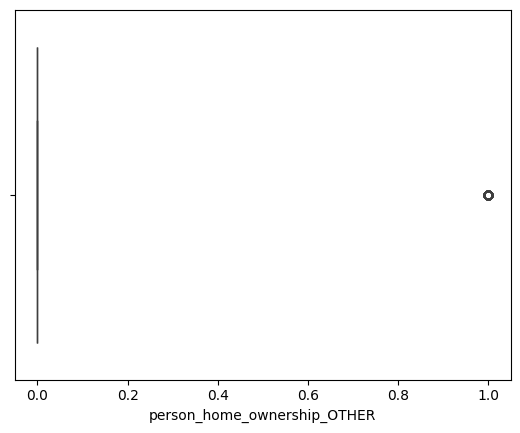

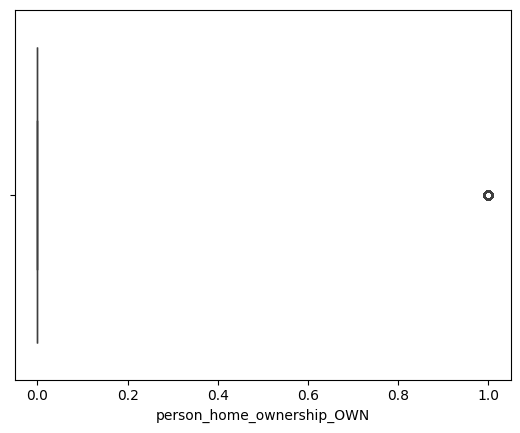

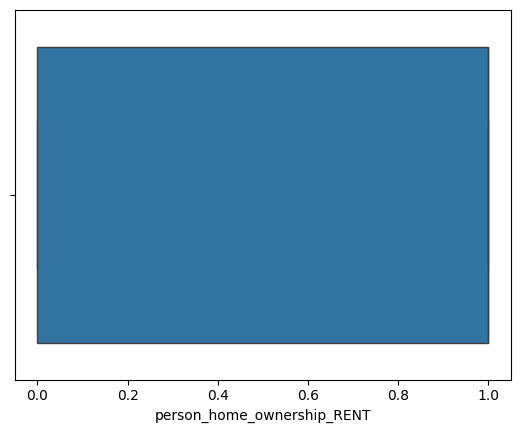

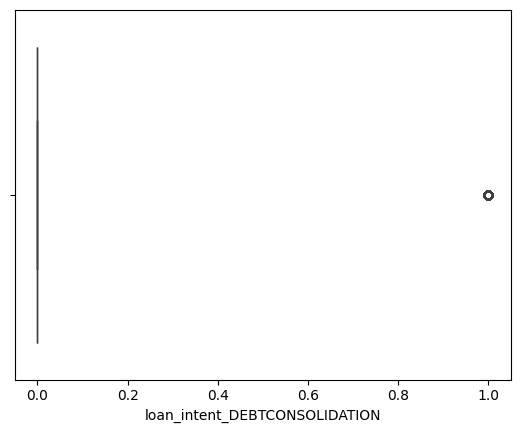

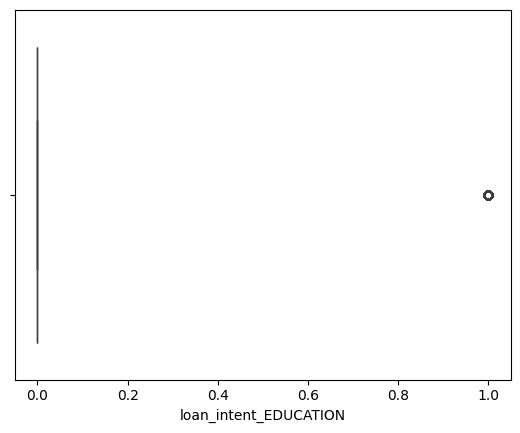

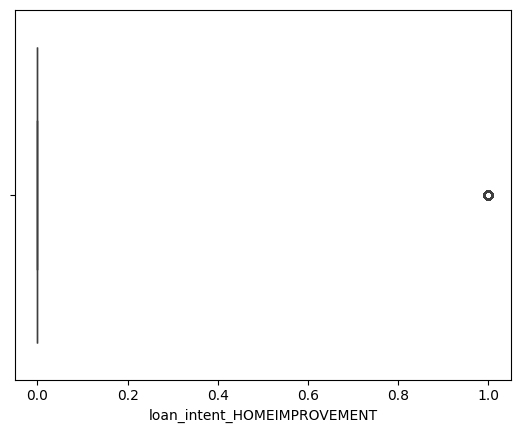

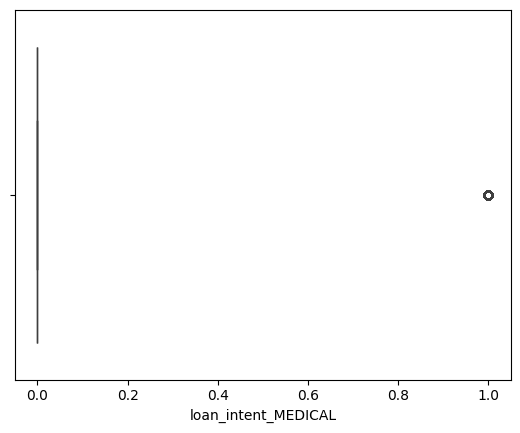

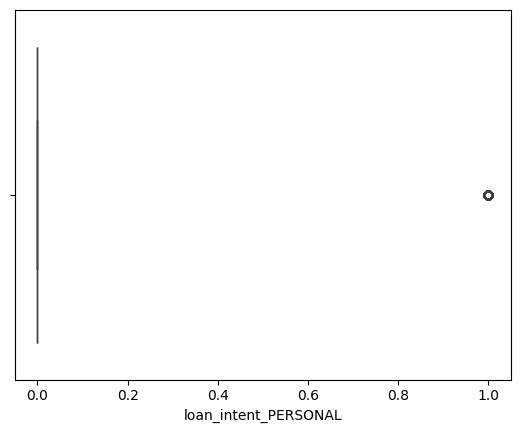

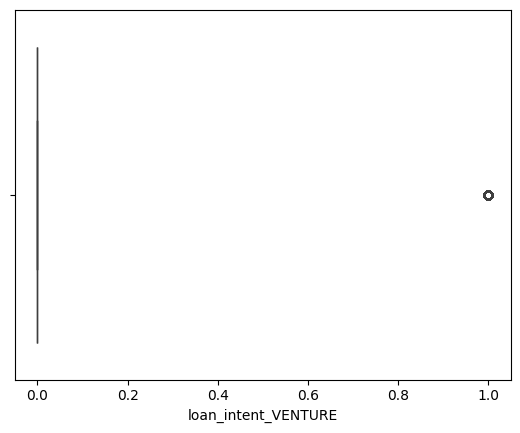

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()

#Histogram

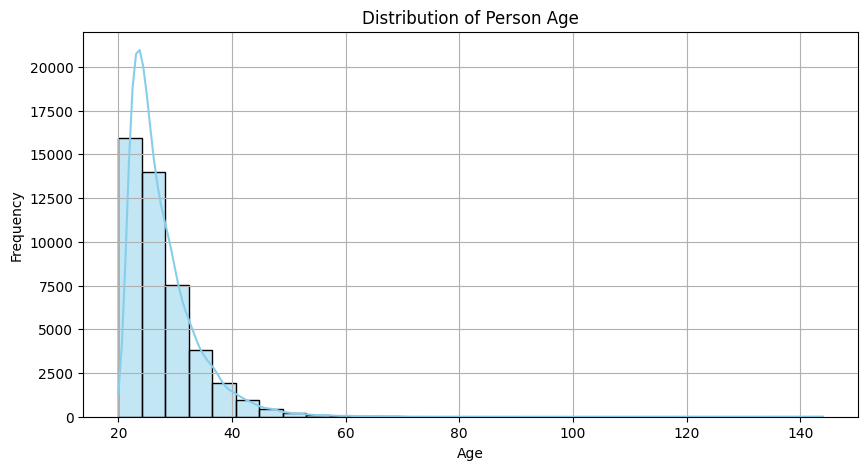

In [ ]:

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["person_income"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Distribution of Person Age")
plt.grid(True)

# Show plot
plt.show()


In [ ]:
q1 = df['person_age'].quantile(0.25)
q3 = df['person_age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['person_age'] < lower_bound) | (df['person_age'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

2188 
 15.0 
 39.0


In [ ]:
df=df[((df['person_age'] >=18) & (df['person_age'] <=50))]

In [ ]:
df.shape

(44672, 23)

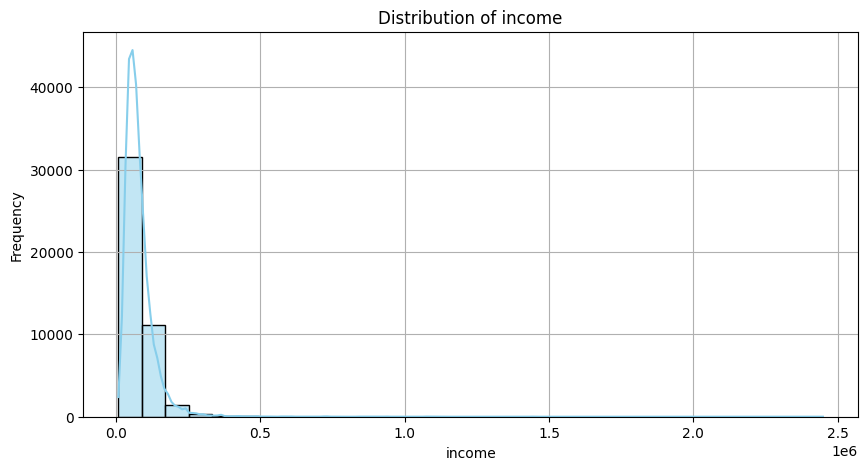

In [ ]:


# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["person_income"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("income")
plt.ylabel("Frequency")
plt.title("Distribution of income")
plt.grid(True)

# Show plot
plt.show()


In [ ]:
q1 = df['person_income'].quantile(0.25)
q3 = df['person_income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['person_income'] < lower_bound) | (df['person_income'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

2192 
 -25620.5 
 168423.5


In [ ]:
df=df[df['person_income'] <=upper_bound]

In [ ]:
df.shape

(42480, 23)

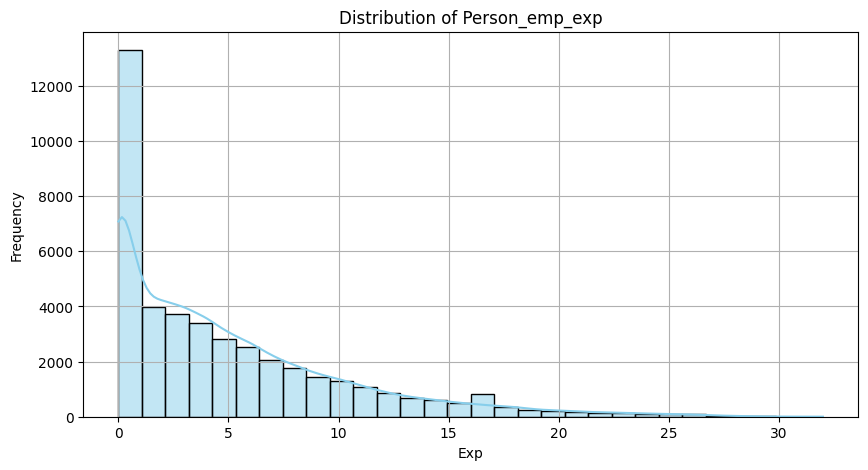

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["person_emp_exp"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("Exp")
plt.ylabel("Frequency")
plt.title("Distribution of Person_emp_exp")
plt.grid(True)

# Show plot
plt.show()


In [ ]:
q1 = df['person_emp_exp'].quantile(0.25)
q3 = df['person_emp_exp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['person_emp_exp'] < lower_bound) | (df['person_emp_exp'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

1268 
 -9.5 
 18.5


In [ ]:
df=df[df['person_emp_exp'] <=upper_bound]

In [ ]:
df.shape

(41212, 23)

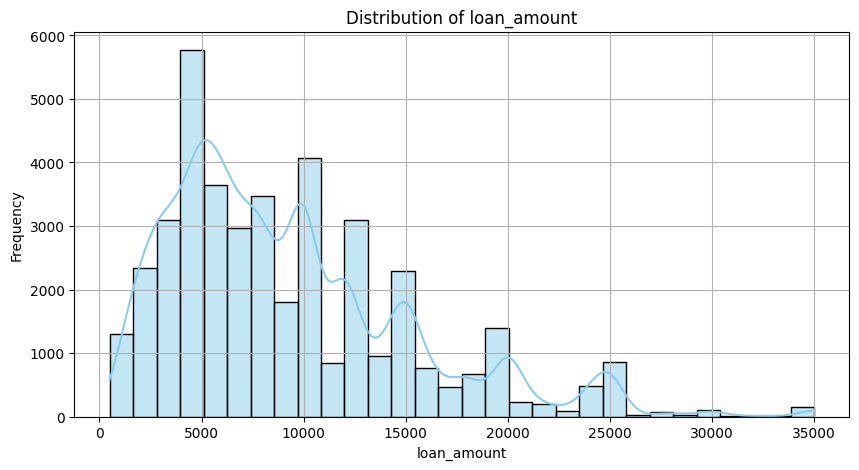

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["loan_amnt"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("loan_amount")
plt.ylabel("Frequency")
plt.title("Distribution of loan_amount")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
q1 = df['loan_amnt'].quantile(0.25)
q3 = df['loan_amnt'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['loan_amnt'] < lower_bound) | (df['loan_amnt'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

1813 
 -5500.0 
 22500.0


In [ ]:
df=df[df['loan_amnt'] <=upper_bound]

In [ ]:
df.shape

(39399, 23)

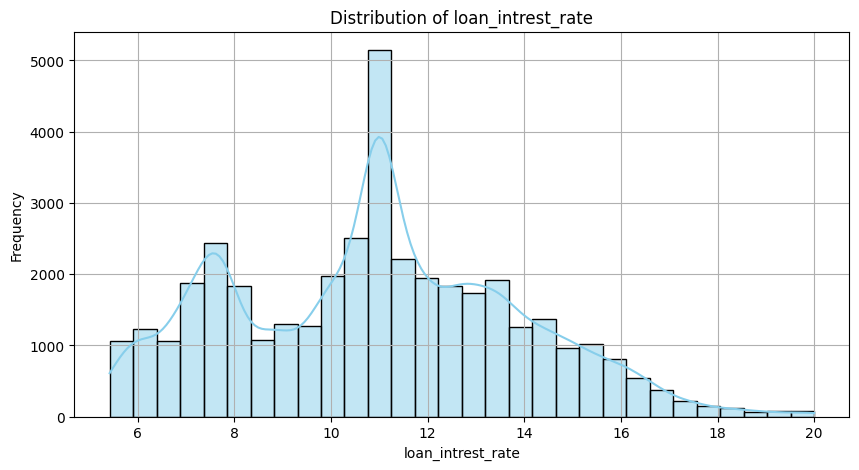

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["loan_int_rate"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("loan_intrest_rate")
plt.ylabel("Frequency")
plt.title("Distribution of loan_intrest_rate")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
q1 = df['loan_int_rate'].quantile(0.25)
q3 = df['loan_int_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['loan_int_rate'] < lower_bound) | (df['loan_int_rate'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

78 
 1.755 
 19.715


In [ ]:
df=df[((df['loan_int_rate'] >=5) & (df['loan_int_rate'] <=upper_bound))]

In [ ]:
df.shape

(39321, 23)

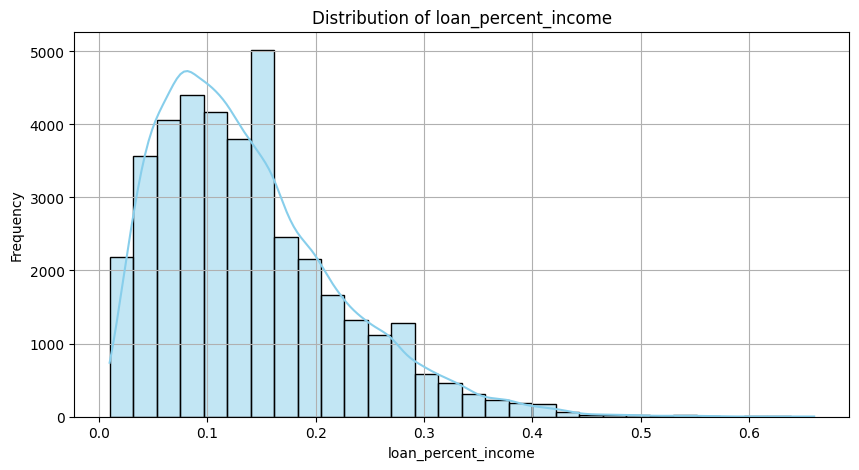

In [ ]:


# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["loan_percent_income"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("loan_percent_income")
plt.ylabel("Frequency")
plt.title("Distribution of loan_percent_income")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
q1 = df['loan_percent_income'].quantile(0.25)
q3 = df['loan_percent_income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['loan_percent_income'] < lower_bound) | (df['loan_percent_income'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

1270 
 -0.06999999999999999 
 0.32999999999999996


In [ ]:
df = df[df['loan_percent_income'] <= upper_bound]

In [ ]:
df.shape

(38051, 23)

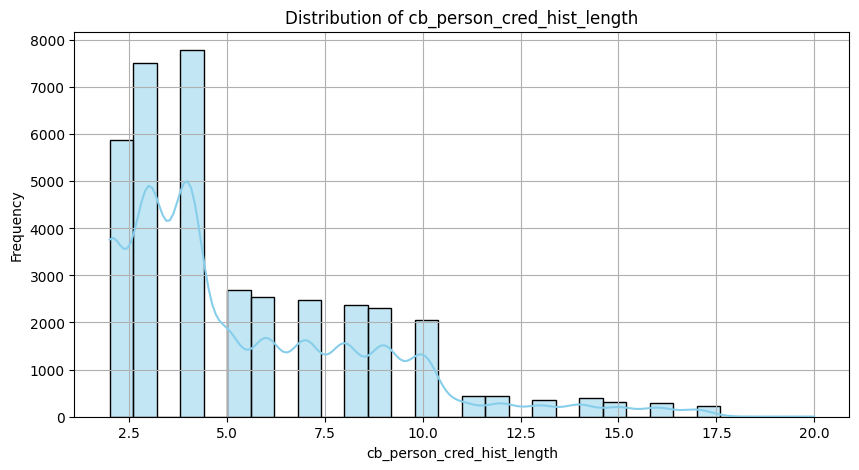

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["cb_person_cred_hist_length"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("cb_person_cred_hist_length")
plt.ylabel("Frequency")
plt.title("Distribution of cb_person_cred_hist_length")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
q1 = df['cb_person_cred_hist_length'].quantile(0.25)
q3 = df['cb_person_cred_hist_length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['cb_person_cred_hist_length'] < lower_bound) | (df['cb_person_cred_hist_length'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

1226 
 -3.0 
 13.0


In [ ]:
df = df[df['cb_person_cred_hist_length'] <= upper_bound]

In [ ]:
df.shape

(36825, 23)

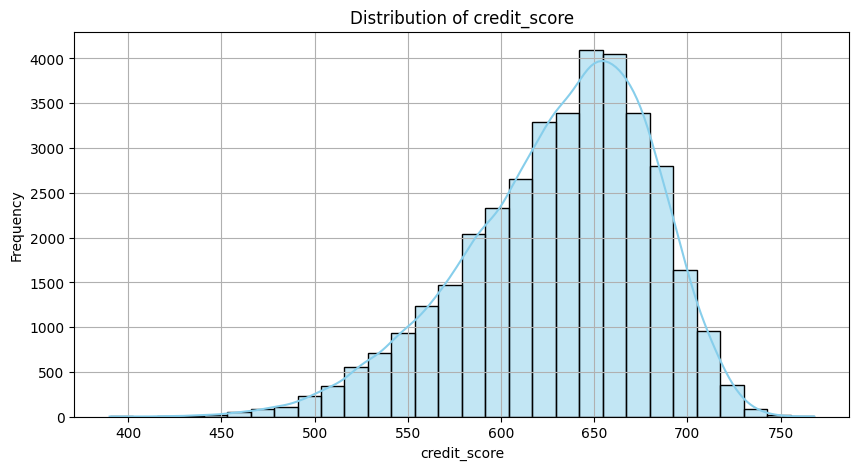

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["credit_score"], bins=30, kde=True, color="skyblue")

# Labels and title
plt.xlabel("credit_score")
plt.ylabel("Frequency")
plt.title("Distribution of credit_score")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
q1 = df['credit_score'].quantile(0.25)
q3 = df['credit_score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound)]
print(len(outliers),"\n",lower_bound,"\n",upper_bound)

397 
 498.0 
 770.0


In [ ]:
df['credit_score'].min()

390

In [ ]:
df['credit_score'].max()

768

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36825 entries, 1 to 44999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36825 non-null  float64
 1   person_education                36825 non-null  int64  
 2   person_income                   36825 non-null  float64
 3   person_emp_exp                  36825 non-null  int64  
 4   loan_amnt                       36825 non-null  float64
 5   loan_int_rate                   36825 non-null  float64
 6   loan_percent_income             36825 non-null  float64
 7   cb_person_cred_hist_length      36825 non-null  float64
 8   credit_score                    36825 non-null  int64  
 9   previous_loan_defaults_on_file  36825 non-null  int64  
 10  loan_status                     36825 non-null  int64  
 11  person_gender_female            36825 non-null  float64
 12  person_gender_male              36825

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(df.drop('loan_status',axis=1),df['loan_status'],test_size=0.2,random_state=42)


#Smote

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#Standardize

In [ ]:
Scalar=StandardScaler()
x_train_resampled=Scalar.fit_transform(x_train_resampled)
x_test=Scalar.transform(x_test)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

r_search = RandomizedSearchCV(rfc, param_grid, cv=5, n_jobs=-1, verbose=2)
model=r_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
ypred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5858
           1       0.84      0.75      0.80      1507

    accuracy                           0.92      7365
   macro avg       0.89      0.86      0.87      7365
weighted avg       0.92      0.92      0.92      7365



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_train_pred = model.predict(x_train_resampled)  # Predictions on training data
y_test_pred = model.predict(x_test)  # Predictions on test data
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")  # Compare with actual train labels
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}") # Compare with actual test labels

Train Accuracy: 1.0000
Test Accuracy: 0.9207


In [ ]:
y_test_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))

[[5647  211]
 [ 373 1134]]


#KNN

In [ ]:
param_dist_knn = {'n_neighbors': [3, 5, 7, 9,11], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn, cv=5, n_jobs=-1, verbose=2, n_iter=10, random_state=42)
knnmodel=random_search_knn.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
ypred=knnmodel.predict(x_test)

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5858
           1       0.65      0.73      0.69      1507

    accuracy                           0.86      7365
   macro avg       0.79      0.81      0.80      7365
weighted avg       0.87      0.86      0.87      7365



In [ ]:
y_train_pred = knnmodel.predict(x_train_resampled)  # Predictions on training data
y_test_pred = knnmodel.predict(x_test)  # Predictions on test data
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")  # Compare with actual train labels
print(f"Test Accuracy: {accuracy_score(y_test, ypred):.4f}") # Compare with actual test labels

Train Accuracy: 1.0000
Test Accuracy: 0.8637


In [ ]:
y_test_pred = knnmodel.predict(x_test)
print(confusion_matrix(y_test, ypred))

[[5261  597]
 [ 407 1100]]


In [ ]:
import numpy as np


#Logistic Regression

In [ ]:
param_dist_log_reg = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2',],
    'solver': ['liblinear', 'saga'],

}


log_reg = LogisticRegression(max_iter=5000)
random_search_log_reg = RandomizedSearchCV(log_reg, param_distributions=param_dist_log_reg, cv=5, n_jobs=-1, verbose=2, n_iter=10, random_state=42)
random_search_log_reg.fit(x_train_resampled, y_train_resampled)

# Best Logistic Regression Model Evaluation
best_log_reg = random_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(x_test)

print("Best Parameters for Logistic Regression:", random_search_log_reg.best_params_)
print("Accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}
Accuracy for Logistic Regression: 0.8591989137813985
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      5858
           1       0.61      0.90      0.72      1507

    accuracy                           0.86      7365
   macro avg       0.79      0.87      0.81      7365
weighted avg       0.90      0.86      0.87      7365



In [ ]:
y_train_pred = best_log_reg.predict(x_train_resampled)  # Predictions on training data
y_test_pred = best_log_reg.predict(x_test)  # Predictions on test data
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")  # Compare with actual train labels
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}") # Compare with actual test labels

Train Accuracy: 0.8896
Test Accuracy: 0.8592


In [ ]:
y_test_pred =  best_log_reg.predict(x_test)
print(confusion_matrix(y_test, y_pred_log_reg))

[[4977  881]
 [ 156 1351]]


#DecisionTreeClassifier

In [ ]:
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, cv=5, n_jobs=-1, verbose=2, n_iter=10, random_state=42)
random_search_dt.fit(x_train_resampled, y_train_resampled)

# Best Decision Tree Model Evaluation
best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
print("Accuracy for Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'entropy'}
Accuracy for Decision Tree: 0.8980312287847929
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      5858
           1       0.75      0.74      0.75      1507

    accuracy                           0.90      7365
   macro avg       0.84      0.84      0.84      7365
weighted avg       0.90      0.90      0.90      7365



In [ ]:
y_train_pred = best_dt.predict(x_train_resampled)  # Predictions on training data
y_test_pred = best_dt.predict(x_test)  # Predictions on test data
print(f"Train Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")  # Compare with actual train labels
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}") # Compare with actual test labels

Train Accuracy: 0.8980
Test Accuracy: 0.8980


In [ ]:
y_test_pred =  best_dt.predict(x_test)
print(confusion_matrix(y_test, y_pred_dt))

[[5493  365]
 [ 386 1121]]


In [ ]:
#pip install --upgrade scikit-learn xgboost


#XGBClassifier

In [ ]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, cv=5, n_jobs=-1, verbose=2, n_iter=10, random_state=42)
random_search_xgb.fit(x_train_resampled, y_train_resampled)

# Best XGBoost Model Evaluation
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Accuracy for XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Accuracy for XGBoost: 0.9344195519348268
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      5858
           1       0.88      0.79      0.83      1507

    accuracy                           0.93      7365
   macro avg       0.91      0.88      0.90      7365
weighted avg       0.93      0.93      0.93      7365



In [ ]:
y_train_pred = best_xgb.predict(x_train_resampled)  # Predictions on training data
y_test_pred = best_xgb.predict(x_test)  # Predictions on test data
print(f"Train Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")  # Compare with actual train labels
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}") # Compare with actual test labels

Train Accuracy: 0.9344
Test Accuracy: 0.9344


In [ ]:
y_test_pred =   best_xgb.predict(x_test)
print(confusion_matrix(y_test, y_pred_xgb))

[[5695  163]
 [ 320 1187]]


In [ ]:
import pickle

In [ ]:
pickle.dump(best_log_reg,open('model.sav','wb'))

In [ ]:
pickle.dump(Scalar,open('Scalar.sav','wb'))

In [ ]:
pickle.dump(ohe1,open('ohe1.sav','wb'))

In [ ]:
pickle.dump(ohe2,open('ohe2.sav','wb'))

In [ ]:
pickle.dump(ohe3,open('ohe3.sav','wb'))

In [ ]:
pickle.dump(LabelEncoder,open('LabelEncoder.sav','wb'))